## Preprocessed DATA

In [23]:
import pandas as pd

file_path = "dataset.xlsx"

ib_data = pd.read_excel(file_path, sheet_name="DATA IB")
ik_data = pd.read_excel(file_path, sheet_name="DATA IK")

# kolom yang relevan --> 'keperluan'
ib_data = ib_data[["desc"]].rename(columns={"desc": "keperluan"})
ik_data = ik_data[["tujuan"]].rename(columns={"tujuan": "keperluan"})

# add kolom penanda 'izin'
ib_data["izin"] = "IB"
ik_data["izin"] = "IK"

combined_data = pd.concat([ib_data, ik_data], ignore_index=True)

# Bersihkan teks pada kolom 'keperluan'
combined_data["keperluan"] = combined_data["keperluan"].str.strip().str.lower()

combined_data.to_csv("combined_ib_ik_keperluan.csv", index=False)

print(combined_data.head())


                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


In [24]:
import pandas as pd

# Muat data
file_path = "combined_ib_ik_keperluan.csv"
data = pd.read_csv(file_path)

# Tampilkan informasi data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80366 entries, 0 to 80365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keperluan  80366 non-null  object
 1   izin       80366 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


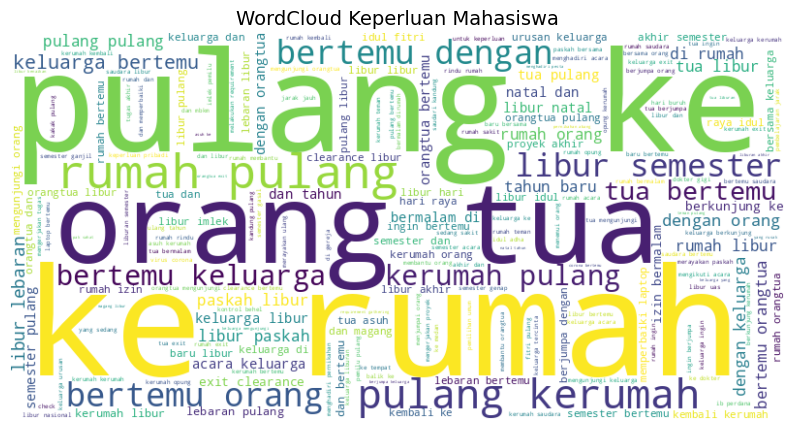

10 Kata Paling Umum dalam Keperluan:
pulang: 25158
rumah: 19215
ke: 18475
bertemu: 15071
libur: 14886
orang: 10994
tua: 10598
keluarga: 10439
kerumah: 9241
dan: 7372
dengan: 5415
semester: 4958
orangtua: 4349
di: 3142
lebaran: 2484
paskah: 2433
acara: 2111
tahun: 1919
bermalam: 1719
natal: 1713


In [25]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Hitung distribusi kata
all_keperluan = " ".join(data["keperluan"])
word_counts = Counter(all_keperluan.split())

# Tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keperluan)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Keperluan Mahasiswa", fontsize=14)
plt.show()

# Tampilkan kata paling umum
common_words = word_counts.most_common(20)
print("10 Kata Paling Umum dalam Keperluan:")
for word, count in common_words:
    print(f"{word}: {count}")


In [26]:
import re

# Klasifikasi keperluan
def classify_keperluan(text):
    if re.search(r"(laptop|printer|buku|barang)", text):
        return "Membeli Barang"
    elif re.search(r"(orangtua|orang tua|keluarga|saudara|pulang|rumah|bertemu|libur|pemilu|ib|pesta|pernikahan|natal|lebaran|paskah|acara|izin bermalam)", text):
        return "Bertemu Keluarga"
    elif re.search(r"(proyek|PKM|tugas|makalah|requirement|observasi|pa 1|pa 2| pa 3|tugas akhir|akhir)", text):
        return "Tugas Kuliah"
    elif re.search(r"(kontrol|gigi|behel|cabut|sakit|berobat)", text):
        return "Pergi ke Klinik"
    elif re.search(r"(atm|rekening|tabungan|kartu)", text):
        return "Mengurus Kartu Bank"
    elif re.search(r"(exit|clearance|wisuda)", text):
        return "Tamat Kuliah"
    else:
        return "Lainnya"

data["kategori"] = data["keperluan"].apply(classify_keperluan)

# Tampilkan hasil klasifikasi
print(data["kategori"].value_counts())

# Simpan hasil klasifikasi
data.to_csv("categorized_keperluan.csv", index=False)


kategori
Bertemu Keluarga       70672
Lainnya                 5440
Tamat Kuliah            1225
Pergi ke Klinik         1006
Membeli Barang           936
Tugas Kuliah             930
Mengurus Kartu Bank      157
Name: count, dtype: int64


In [27]:
opp_data = pd.read_csv("categorized_keperluan.csv")
opp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80366 entries, 0 to 80365
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keperluan  80366 non-null  object
 1   izin       80366 non-null  object
 2   kategori   80366 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode kategori menjadi nilai numerik
label_encoder = LabelEncoder()
opp_data["kategori_encoded"] = label_encoder.fit_transform(opp_data["kategori"])

# Tampilkan hasil
print(opp_data[["kategori", "kategori_encoded"]].head())


           kategori  kategori_encoded
0  Bertemu Keluarga                 0
1  Bertemu Keluarga                 0
2  Bertemu Keluarga                 0
3  Bertemu Keluarga                 0
4  Bertemu Keluarga                 0


In [33]:
from sklearn.model_selection import train_test_split

# Fitur dan target
X = opp_data[["kategori_encoded"]]  # Menggunakan kategori encoded
y = opp_data["kategori_encoded"]

# Split data ke dalam train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

Ukuran Train: (56256, 1), Ukuran Test: (24110, 1)
       kategori_encoded
37973                 0
38957                 0
3698                  1
38947                 0
72939                 0
       kategori_encoded
55741                 0
63728                 0
39538                 5
21769                 0
58173                 0


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi pada test set
rf_predictions = rf_model.predict(X_test)

# Evaluasi performa
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21244
           1       1.00      1.00      1.00      1599
           2       1.00      1.00      1.00       254
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00       308
           5       1.00      1.00      1.00       359
           6       1.00      1.00      1.00       291

    accuracy                           1.00     24110
   macro avg       1.00      1.00      1.00     24110
weighted avg       1.00      1.00      1.00     24110

Accuracy: 1.00


In [35]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Latih model
lr_model.fit(X_train, y_train)

# Prediksi pada test set
lr_predictions = lr_model.predict(X_test)

# Evaluasi performa
print("Logistic Regression Report:")
print(classification_report(y_test, lr_predictions))
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")


Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21244
           1       1.00      1.00      1.00      1599
           2       1.00      1.00      1.00       254
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00       308
           5       1.00      1.00      1.00       359
           6       1.00      1.00      1.00       291

    accuracy                           1.00     24110
   macro avg       1.00      1.00      1.00     24110
weighted avg       1.00      1.00      1.00     24110

Accuracy: 1.00


In [36]:
from sklearn.model_selection import GridSearchCV

# Parameter untuk tuning
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# GridSearch
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring="accuracy")
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print(f"Best Accuracy: {rf_grid.best_score_:.2f}")


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.00


In [37]:
# Parameter untuk tuning
lr_params = {
    "C": [0.1, 1, 10],
    "solver": ["lbfgs", "liblinear"],
}

# GridSearch
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring="accuracy")
lr_grid.fit(X_train, y_train)

print("Best Logistic Regression Params:", lr_grid.best_params_)
print(f"Best Accuracy: {lr_grid.best_score_:.2f}")


Best Logistic Regression Params: {'C': 10, 'solver': 'lbfgs'}
Best Accuracy: 1.00


In [38]:
from sklearn.pipeline import Pipeline

# Pipeline Random Forest
rf_pipeline = Pipeline([
    ("rf", RandomForestClassifier(**rf_grid.best_params_, random_state=42))
])

# Pipeline Logistic Regression
lr_pipeline = Pipeline([
    ("lr", LogisticRegression(**lr_grid.best_params_, random_state=42, max_iter=1000))
])

# Latih ulang pipeline
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('lr',
                 LogisticRegression(C=10, max_iter=1000, random_state=42))])

In [39]:
# Evaluasi Random Forest
rf_final_predictions = rf_pipeline.predict(X_test)
rf_final_accuracy = accuracy_score(y_test, rf_final_predictions)
print(f"Final Random Forest Accuracy: {rf_final_accuracy:.2f}")

# Evaluasi Logistic Regression
lr_final_predictions = lr_pipeline.predict(X_test)
lr_final_accuracy = accuracy_score(y_test, lr_final_predictions)
print(f"Final Logistic Regression Accuracy: {lr_final_accuracy:.2f}")


Final Random Forest Accuracy: 1.00
Final Logistic Regression Accuracy: 1.00


In [40]:
# Prediksi kategori untuk teks baru
new_texts = [
    "Pulang kerumah keluarga besar untuk Lebaran",
    "Membeli laptop baru untuk tugas kuliah",
    "Pergi ke rumah sakit untuk kontrol kesehatan"
]

# Fungsi klasifikasi menggunakan aturan sebelumnya
def classify_new_texts(texts):
    predicted_categories = []
    for text in texts:
        if re.search(r"(laptop|printer|buku|barang)", text):
            predicted_categories.append("Membeli Barang")
        elif re.search(r"(orangtua|orang tua|keluarga|saudara|pulang|rumah|bertemu|libur|pemilu|ib|pesta|pernikahan|natal|lebaran|paskah|acara|izin bermalam)", text):
            predicted_categories.append("Bertemu Keluarga")
        elif re.search(r"(proyek|PKM|tugas|makalah|requirement|observasi|pa 1|pa 2| pa 3|tugas akhir|akhir)", text):
            predicted_categories.append("Tugas Kuliah")
        elif re.search(r"(kontrol|gigi|behel|cabut|sakit|berobat)", text):
            predicted_categories.append("Pergi ke Klinik")
        elif re.search(r"(atm|rekening|tabungan|kartu)", text):
            predicted_categories.append("Mengurus Kartu Bank")
        elif re.search(r"(exit|clearance|wisuda)", text):
            predicted_categories.append("Tamat Kuliah")
        else:
            predicted_categories.append("Lainnya")
    return predicted_categories

# Klasifikasi menggunakan aturan
classified_texts = classify_new_texts(new_texts)
print("Classified Texts:", classified_texts)

# Convert kategori ke encoding numerik untuk prediksi model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
opp_data["kategori_encoded"] = label_encoder.fit_transform(opp_data["kategori"])  # Pastikan ini telah dilakukan sebelumnya
new_text_encoded = label_encoder.transform(classified_texts)

# Prediksi menggunakan Random Forest
rf_predictions = rf_pipeline.predict(new_text_encoded.reshape(-1, 1))
rf_predictions_decoded = label_encoder.inverse_transform(rf_predictions)
print("Random Forest Predictions:", rf_predictions_decoded)

# Prediksi menggunakan Logistic Regression
lr_predictions = lr_pipeline.predict(new_text_encoded.reshape(-1, 1))
lr_predictions_decoded = label_encoder.inverse_transform(lr_predictions)
print("Logistic Regression Predictions:", lr_predictions_decoded)

# Map predictions to opportunities
opportunities = {
    "Membeli Barang": "Promosi produk elektronik dan alat tulis",
    "Bertemu Keluarga": "Penawaran tiket liburan atau transportasi",
    "Tugas Kuliah": "Layanan printing dan material akademik",
    "Pergi ke Klinik": "Paket layanan kesehatan",
    "Mengurus Kartu Bank": "Layanan pengelolaan keuangan mahasiswa",
    "Tamat Kuliah": "Dukungan karir dan sertifikasi tambahan",
    "Lainnya": "Layanan umum untuk kebutuhan mahasiswa"
}

print("Recommended Services:")
for category in rf_predictions_decoded:
    print(f"Category: {category} --> {opportunities.get(category, 'Tidak Ada Peluang')}")


Classified Texts: ['Bertemu Keluarga', 'Membeli Barang', 'Bertemu Keluarga']
Random Forest Predictions: ['Bertemu Keluarga' 'Membeli Barang' 'Bertemu Keluarga']
Logistic Regression Predictions: ['Bertemu Keluarga' 'Membeli Barang' 'Bertemu Keluarga']
Recommended Services:
Category: Bertemu Keluarga --> Penawaran tiket liburan atau transportasi
Category: Membeli Barang --> Promosi produk elektronik dan alat tulis
Category: Bertemu Keluarga --> Penawaran tiket liburan atau transportasi


/home/ownsys/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/ownsys/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(opp_data["keperluan"])
y = opp_data["kategori"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9980714196839616

Classification Report:
                      precision    recall  f1-score   support

   Bertemu Keluarga       1.00      1.00      1.00     14136
            Lainnya       0.99      0.99      0.99      1171
     Membeli Barang       1.00      0.99      0.99       159
Mengurus Kartu Bank       0.95      0.90      0.93        42
    Pergi ke Klinik       1.00      0.98      0.99       130
       Tamat Kuliah       1.00      1.00      1.00       239
       Tugas Kuliah       0.96      0.96      0.96       197

           accuracy                           1.00     16074
          macro avg       0.99      0.98      0.98     16074
       weighted avg       1.00      1.00      1.00     16074



In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'keperluan' into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(opp_data["kategori"])

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply K-Means
k = 5  # Chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the data
combined_data['cluster'] = labels

# Save the clustered data for further analysis
combined_data.to_csv("clustered_keperluan.csv", index=False)

# Print cluster counts
print("Cluster counts:")
print(combined_data['cluster'].value_counts())


Cluster counts:
cluster
0    48512
3    15877
4     7635
2     5183
1     3159
Name: count, dtype: int64


In [9]:
from collections import Counter

# Analyze top words in each cluster
for cluster_num in range(optimal_k):
    cluster_data = combined_data[combined_data["cluster"] == cluster_num]["keperluan"]
    word_counts = Counter(" ".join(cluster_data).split())
    print(f"Top words in cluster {cluster_num}: {word_counts.most_common(10)}")


Top words in cluster 0: [('libur', 14648), ('pulang', 8602), ('kerumah', 8505), ('dan', 6318), ('rumah', 5505), ('semester', 4934), ('keluarga', 4931), ('ke', 4894), ('di', 2857), ('lebaran', 2418)]
Top words in cluster 1: [('orangtua', 3033), ('bertemu', 2842), ('dengan', 1186), ('dan', 410), ('mengunjungi', 283), ('keluarga', 148), ('orangtua.', 137), ('pulang', 98), ('ingin', 96), ('libur', 48)]
Top words in cluster 2: [('keluarga', 5120), ('bertemu', 4310), ('acara', 900), ('dengan', 884), ('dan', 160), ('pulang', 146), ('ingin', 116), ('keluarga.', 101), ('rumah', 80), ('tercinta', 77)]
Top words in cluster 3: [('pulang', 15755), ('ke', 13250), ('rumah', 13137), ('orang', 922), ('tua', 904), ('orangtua', 413), ('keluarga', 90), ('rumah.', 90), ('opung', 81), ('pulang.', 74)]
Top words in cluster 4: [('orang', 7646), ('tua', 7474), ('bertemu', 5818), ('dengan', 1645), ('kerumah', 686), ('pulang', 557), ('dan', 484), ('rumah', 475), ('mengunjungi', 362), ('asuh', 288)]


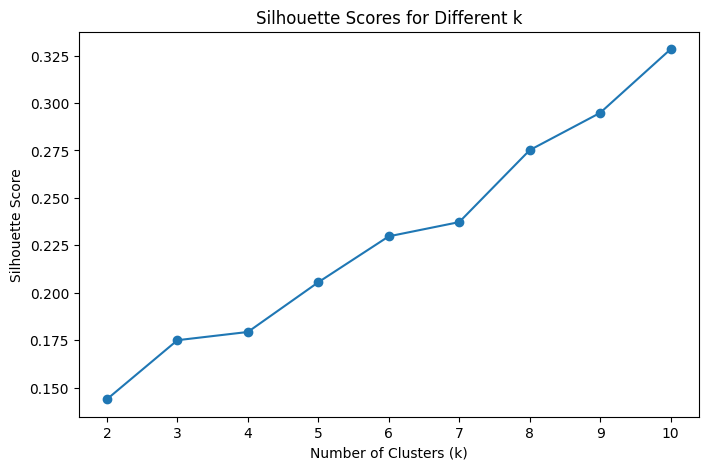

In [11]:
from sklearn.metrics import silhouette_score

K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply K-Means
k = 5  # Chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the data
combined_data['cluster'] = labels

# Save the clustered data for further analysis
combined_data.to_csv("clustered_keperluan.csv", index=False)

# Print cluster counts
print("Cluster counts:")
print(combined_data['cluster'].value_counts())


Cluster counts:
cluster
0    48512
3    15877
4     7635
2     5183
1     3159
Name: count, dtype: int64


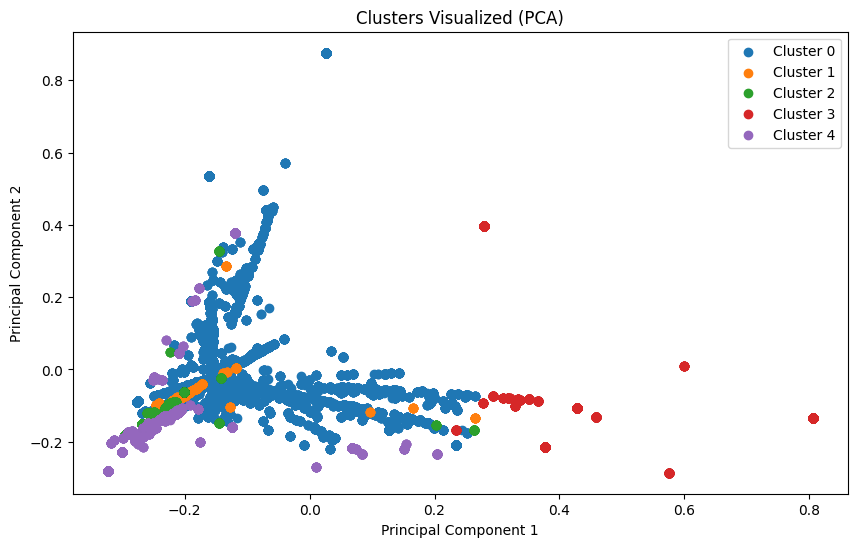

In [15]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = reduced_data[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title("Clusters Visualized (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [16]:
# Analyze the common terms in each cluster
from collections import Counter

for cluster in range(k):
    print(f"\nTop terms in Cluster {cluster}:")
    cluster_terms = " ".join(combined_data[combined_data['cluster'] == cluster]['keperluan'])
    cluster_word_counts = Counter(cluster_terms.split()).most_common(10)
    for term, count in cluster_word_counts:
        print(f"{term}: {count}")



Top terms in Cluster 0:
libur: 14648
pulang: 8602
kerumah: 8505
dan: 6318
rumah: 5505
semester: 4934
keluarga: 4931
ke: 4894
di: 2857
lebaran: 2418

Top terms in Cluster 1:
orangtua: 3033
bertemu: 2842
dengan: 1186
dan: 410
mengunjungi: 283
keluarga: 148
orangtua.: 137
pulang: 98
ingin: 96
libur: 48

Top terms in Cluster 2:
keluarga: 5120
bertemu: 4310
acara: 900
dengan: 884
dan: 160
pulang: 146
ingin: 116
keluarga.: 101
rumah: 80
tercinta: 77

Top terms in Cluster 3:
pulang: 15755
ke: 13250
rumah: 13137
orang: 922
tua: 904
orangtua: 413
keluarga: 90
rumah.: 90
opung: 81
pulang.: 74

Top terms in Cluster 4:
orang: 7646
tua: 7474
bertemu: 5818
dengan: 1645
kerumah: 686
pulang: 557
dan: 484
rumah: 475
mengunjungi: 362
asuh: 288


In [21]:
# Predict cluster for new text
new_text = ["pulang ke rumah"]
new_text_vec = vectorizer.transform(new_text)  # Use the same vectorizer from clustering
predicted_cluster = kmeans.predict(new_text_vec)[0]

# Map cluster to opportunity
opportunities = {
    0: "Holiday packages and travel deals",
    1: "Transport services for parents",
    2: "Event planning for family reunions",
    3: "Discounted travel home offers",
    4: "Elderly care services"
}

print("Predicted Cluster:", predicted_cluster)
print("Recommended Service:", opportunities[predicted_cluster])


Predicted Cluster: 3
Recommended Service: Discounted travel home offers


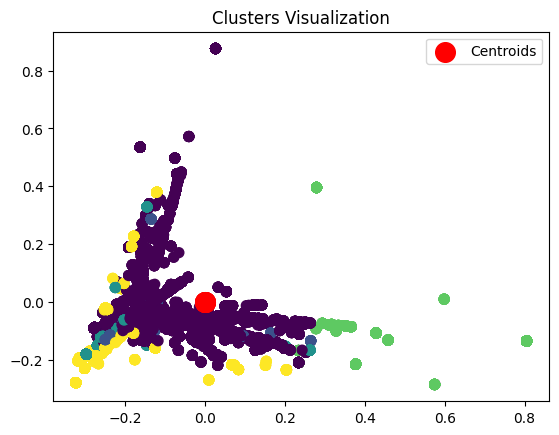

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("Clusters Visualization")
plt.legend()
plt.show()
